In [ ]:
# To do
# -----
# 2. try to run from matlab
# 3. try in windows computer




In [8]:
# To do
# -----
# 1. take out traces of smooth pursuit
# 2. draw color camembert in view
# 3. save figure per run - sequence
# 4. compute saccade, put onset and offset in graph

# Saccade analysis per run and sequence
# Define figure
title_font = {'loc':'left', 'fontsize':14, 'fontweight':'bold'}
axis_label_font = {'fontsize':14}
bg_col = (0.9, 0.9, 0.9)
axis_width = 0.75
line_width_corr = 1.5

# Horizontal eye trace
screen_val =  12.5
ymin1,ymax1,y_tick_num1 = -screen_val,screen_val,11
xmin1,xmax1,x_tick_num1 = 0,1,num_run+1
y_tick1 = np.linspace(ymin1,ymax1,y_tick_num1)
x_tick1 = np.linspace(xmin1,xmax1,x_tick_num1)

# Vertical eye trace
ymin2,ymax2,y_tick_num2 = -screen_val,screen_val,11
xmin2,xmax2,x_tick_num2 = 0,1,num_run+1
y_tick2 = np.linspace(ymin2,ymax2,y_tick_num2)
x_tick2 = np.linspace(xmin2,xmax2,x_tick_num2)

try: os.makedirs('{file_dir}/add/figures/'.format(file_dir = file_dir))
except: pass

cmap = 'hsv'
cmap_steps = 17
col_offset = 1/14.0
base = cortex.utils.get_cmap(cmap)
val = np.linspace(0, 1,cmap_steps+1,endpoint=False)
colmap = colors.LinearSegmentedColormap.from_list('my_colmap',base(val), N = cmap_steps)

pursuit_polar_ang = np.deg2rad(np.arange(0,360,22.5))
pursuit_ang_norm  = (pursuit_polar_ang + np.pi) / (np.pi * 2.0)
pursuit_ang_norm  = (np.fmod(pursuit_ang_norm + col_offset,1))*cmap_steps

pursuit_col_mat = colmap(pursuit_ang_norm.astype(int))
pursuit_col_mat[:,3]=0.2

saccade_polar_ang = np.deg2rad(np.arange(0,360,22.5)+180)
saccade_ang_norm  = (saccade_polar_ang + np.pi) / (np.pi * 2.0)
saccade_ang_norm  = (np.fmod(saccade_ang_norm + col_offset,1))*cmap_steps

saccade_col_mat = colmap(saccade_ang_norm.astype(int))
saccade_col_mat[:,3]=0.2


NameError: name 'dd' is not defined

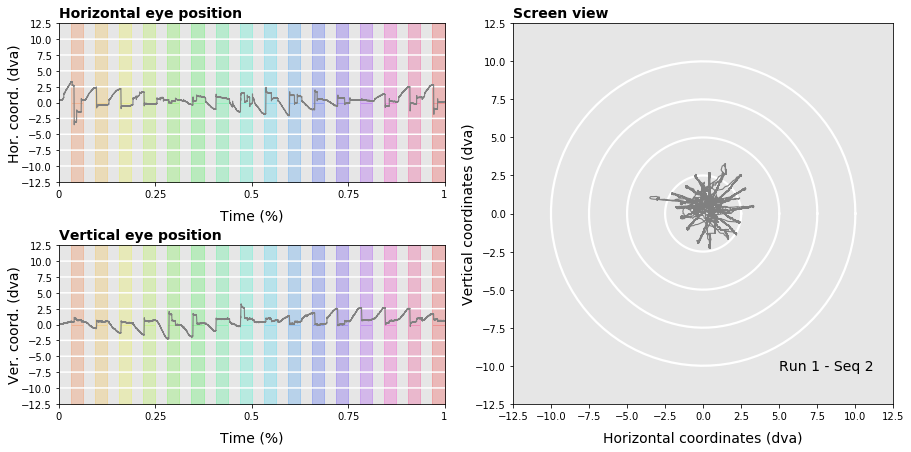

In [10]:


for run_plot in np.arange(0,num_run,1):
    
    fig = plt.figure(figsize = (15, 7))
    gridspec.GridSpec(2,8)
    
    run_data_logic = eye_data_runs_no_blink[:,3] == run_plot
    for seq_plot in eye_mov_seq:
        seq_data_logic = np.logical_and(eye_data_runs_no_blink[:,0] >= time_start_seq[seq_plot,run_plot],
                                        eye_data_runs_no_blink[:,0] <= time_end_seq[seq_plot,run_plot])
        
        data_logic = np.logical_and(run_data_logic,seq_data_logic)

        dur_seq = time_end_seq[seq_plot,run_plot]-time_start_seq[seq_plot,run_plot]
        time_prct = ((eye_data_runs_no_blink[data_logic][:,0]- time_start_seq[seq_plot,run_plot])/dur_seq)
        

        xmin1,xmax1,x_tick_num1 = 0,1,5
        xmin2,xmax2,x_tick_num2 = 0,1,5
        x_tick1 = np.linspace(xmin1,xmax1,x_tick_num1)
        x_tick2 = np.linspace(xmin2,xmax2,x_tick_num2)

        # Horizontal eye trace
        ax1 = plt.subplot2grid((2,8),(0,0),rowspan= 1, colspan = 4)
        ax1.set_ylabel('Hor. coord. (dva)',axis_label_font,labelpad = 0)
        ax1.set_ylim(bottom = ymin1, top = ymax1)
        ax1.set_yticks(y_tick1)
        ax1.set_xlabel('Time (%)',axis_label_font,labelpad = 10)
        ax1.set_xlim(left = xmin1, right = xmax1)
        ax1.set_xticks(x_tick1)
        ax1.set_facecolor(bg_col)
        ax1.set_title('Horizontal eye position',**title_font)
        ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2g'))
        
        for sac_col_num,sac in enumerate(saccades_tr):
            fill_x = [sac/seq_trs, (sac+1)/seq_trs, (sac+1)/seq_trs , sac/seq_trs]
            fill_y = [-screen_val,-screen_val,screen_val,screen_val]
            ax1.fill_between(fill_x, fill_y, color = saccade_col_mat[sac_col_num,:])
            
#         for pursuit_col_num, pursuit in enumerate(pursuits_tr):
#             fill_x = [pursuit/seq_trs, (pursuit+1)/seq_trs, (pursuit+1)/seq_trs , pursuit/seq_trs]
#             fill_y = [-screen_val,-screen_val,screen_val,screen_val]
#             ax1.fill_between(fill_x, fill_y, color = pursuit_col_mat[pursuit_col_num,:])
        
        
        for rad in rads:
            ax1.plot(time_prct,time_prct*0+rad, color = [1,1,1], linewidth = axis_width*2)
            ax1.plot(time_prct,time_prct*0-rad, color = [1,1,1], linewidth = axis_width*2)

        ax1.plot(time_prct,eye_data_runs_no_blink[data_logic,1],color = [0.5,0.5,0.5],linewidth = axis_width*1.5)    
    
        # Vertical eye trace
        ax2 = plt.subplot2grid((2,8),(1,0),rowspan= 1, colspan = 4)
        ax2.set_ylabel('Ver. coord. (dva)',axis_label_font, labelpad = 0)
        ax2.set_ylim(bottom = ymin2, top = ymax2)
        ax2.set_yticks(y_tick2)
        ax2.set_xlabel('Time (%)',axis_label_font, labelpad = 10)
        ax2.set_xlim(left = xmin2, right = xmax2)
        ax2.set_xticks(x_tick2)
        ax2.set_facecolor(bg_col)
        ax2.set_title('Vertical eye position',**title_font)
        ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2g'))
        for rad in rads:
            ax2.plot(time_prct,time_prct*0+rad, color = [1,1,1], linewidth = axis_width*2)
            ax2.plot(time_prct,time_prct*0-rad, color = [1,1,1], linewidth = axis_width*2)

        ax2.plot(time_prct,eye_data_runs_no_blink[data_logic,2],color = [0.5,0.5,0.5],linewidth = axis_width*1.5)

        for sac_col_num,sac in enumerate(saccades_tr):
            fill_x = [sac/seq_trs, (sac+1)/seq_trs, (sac+1)/seq_trs , sac/seq_trs]
            fill_y = [-screen_val,-screen_val,screen_val,screen_val]
            ax2.fill_between(fill_x, fill_y, color = saccade_col_mat[sac_col_num,:])
            
#         for pursuit_col_num, pursuit in enumerate(pursuits_tr):
#             fill_x = [pursuit/seq_trs, (pursuit+1)/seq_trs, (pursuit+1)/seq_trs , pursuit/seq_trs]
#             fill_y = [-screen_val,-screen_val,screen_val,screen_val]
#             ax2.fill_between(fill_x, fill_y, color = pursuit_col_mat[pursuit_col_num,:])
        
        
        # Screen eye trace
        ax3 = plt.subplot2grid((2,8),(0,4),rowspan= 2, colspan = 4)
        ax3.set_xlabel('Horizontal coordinates (dva)', axis_label_font, labelpad = 10)
        ax3.set_ylabel('Vertical coordinates (dva)', axis_label_font, labelpad = 0)
        ax3.set_xlim(left = ymin1, right = ymax1)
        ax3.set_xticks(y_tick1)
        ax3.set_ylim(bottom = ymin2, top = ymax2)
        ax3.set_yticks(y_tick2)
        ax3.set_facecolor(bg_col)
        ax3.set_title('Screen view',**title_font)
        ax3.set_aspect('equal')

        theta = np.linspace(0, 2*np.pi, 100)
        for rad in rads:
            ax3.plot(rad*np.cos(theta), rad*np.sin(theta),color = [1,1,1],linewidth = axis_width*3)

        ax3.plot(eye_data_runs_no_blink[data_logic,1],eye_data_runs_no_blink[data_logic,2],color = [0.5,0.5,0.5],linewidth = axis_width*1.5)
        ax3.text(5, -10, 'Run {run_plot} - Seq {seq_plot}'.format(run_plot = run_plot+1, seq_plot = seq_plot+1), horizontalalignment = 'left', verticalalignment = 'center', fontsize = 14)

        plt.subplots_adjust(wspace = 1.4,hspace = 0.4)
#         plt.savefig("{file_dir}/add/figures/{filename}_eyeData_eyetraces.png".format(file_dir = file_dir, filename = list_filename[run_plot]),facecolor='w')
        dd